In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
from scipy.signal import find_peaks
#plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 12})

In [82]:
data_dir = '../data/processed_25_02_2020/'
fname = 'trial4'
save_dir = '../data/processed_25_02_2020/results/'

B_DELAY = 5
F_LENGTH=1095 # totally have second

# upload trial data
[pac_df, tapped_idx, labels] = pickle.load(open( data_dir + fname +'_essentials.pkl', 'rb') )

/home/tasbolat/tas_python_env/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/tasbolat/tas_python_env/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/tasbolat/tas_python_env/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


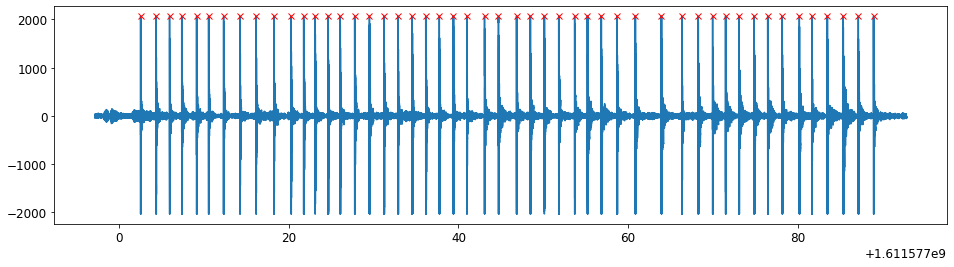

In [3]:
# visualize the data
fig, ax = plt.subplots(figsize=(16,4))
ax.plot(pac_df.t, pac_df.pac)
ax.plot(pac_df.t[tapped_idx], pac_df.pac[tapped_idx], 'rx')
plt.show()

In [4]:
# Let's look at one sample example
def get_tap_signal(n,b=B_DELAY, a=F_LENGTH, zeroed=True):
    chunck = pac_df.iloc[-b+tapped_idx[n]:tapped_idx[n]+a]
    chunck = chunck.reset_index()
    if zeroed:
        chunck.t = chunck.t-chunck.t[0]
    return chunck.pac.values, chunck.t.values

In [5]:
sample_signal, _ = get_tap_signal(5)

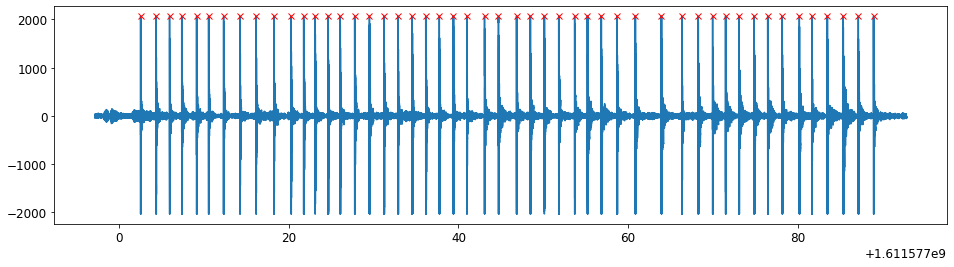

In [6]:
# visualize the data
fig, ax = plt.subplots(figsize=(16,4))
ax.plot(pac_df.t, pac_df.pac)
ax.plot(pac_df.t[tapped_idx], pac_df.pac[tapped_idx], 'rx')
plt.show()

In [7]:
# some fft results
sf = 2.2e3 #kHz
n = len(sample_signal)
fhat = np.fft.fft(sample_signal, n)
frequencies = np.arange(n)
L = np.arange(1,np.floor(n/2),dtype='int')

magnitude = np.abs(fhat)

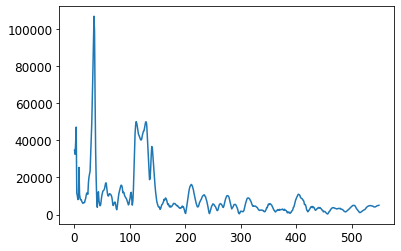

In [8]:
plt.plot(frequencies[L], magnitude[L])

###  FFT analysis

In [9]:
def fft_analysis(b,a,tap_id=5):
    sample_signal, _t = get_tap_signal(tap_id, b, a)
    # some fft results
    sf = 2.2e3 #kHz
    n = len(sample_signal)
    fhat = np.fft.fft(sample_signal, n)
    frequencies = np.fft.fftfreq(n, 1/sf)
    #frequencies = np.arange(n)
    L = np.arange(1,np.floor(n/2),dtype='int')

    magnitude = np.abs(fhat)/n
    angles = np.angle(fhat)
    
    return frequencies[L], magnitude[L], angles[L], sample_signal, _t

In [10]:
my_b = 5
my_a = 1095
signal_id = 1

In [11]:
labels[24], labels[4]

([0.7316123247146606, 0.1174226775765419, 0.28866222533667923],
 [0.6139542162418365, 0.3790270984172821, 0.3970861697175166])

In [ ]:
# fix b, change a
my_as = [100, 254, 512, 1024, 2046, 3000]
signal_ids = np.random.randint(low=0, high=50, size=10)
for signal_id in signal_ids:
    fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(16,20))
    for i, my_a in enumerate(my_as):
        freq, mag, ang, sample_signal, _t = fft_analysis(my_b,my_a,signal_id)
        ax[i][0].plot(_t, sample_signal)
        ax[i][0].set_xlabel('Time, s')
        _peaks,_ = find_peaks(mag/mag.max(), height=0.2, distance=int(20/np.diff(freq)[0])+1)
        ax[i][1].plot(freq, mag/mag.max())
        ax[i][1].plot(freq[_peaks], mag[_peaks]/mag.max(), 'rx')
        ax[i][1].set_xlabel('Freq, hz')
        for _peak in _peaks:
            #print(freq[_peak], mag[_peak], str('{:.0f}'.format(mag[_peak])))
            ax[i][1].text(x=freq[_peak], y=mag[_peak]/mag.max(), s=str('{:.0f}'.format(freq[_peak])))

    #     ax[i][2].plot(freq, ang)
    #     ax[i][2].set_xlabel('Freq, hz')
        ax[i][0].set_title('a=' + str(my_a)+ ', b=' + str(my_b))
        plt.suptitle('Signal_id=' + str(signal_id) + ', label={:.1f},{:.1f},{:.1f}'.format(*labels[signal_id]), fontsize=18, y= 1.0)
    plt.tight_layout(True)
    plt.savefig(save_dir+'{}_{}_fft.png'.format(fname, signal_id))
    plt.show()

In [ ]:
#!zip -rf data/processed_25_02_2020/results data/processed_25_02_2020/results.zip

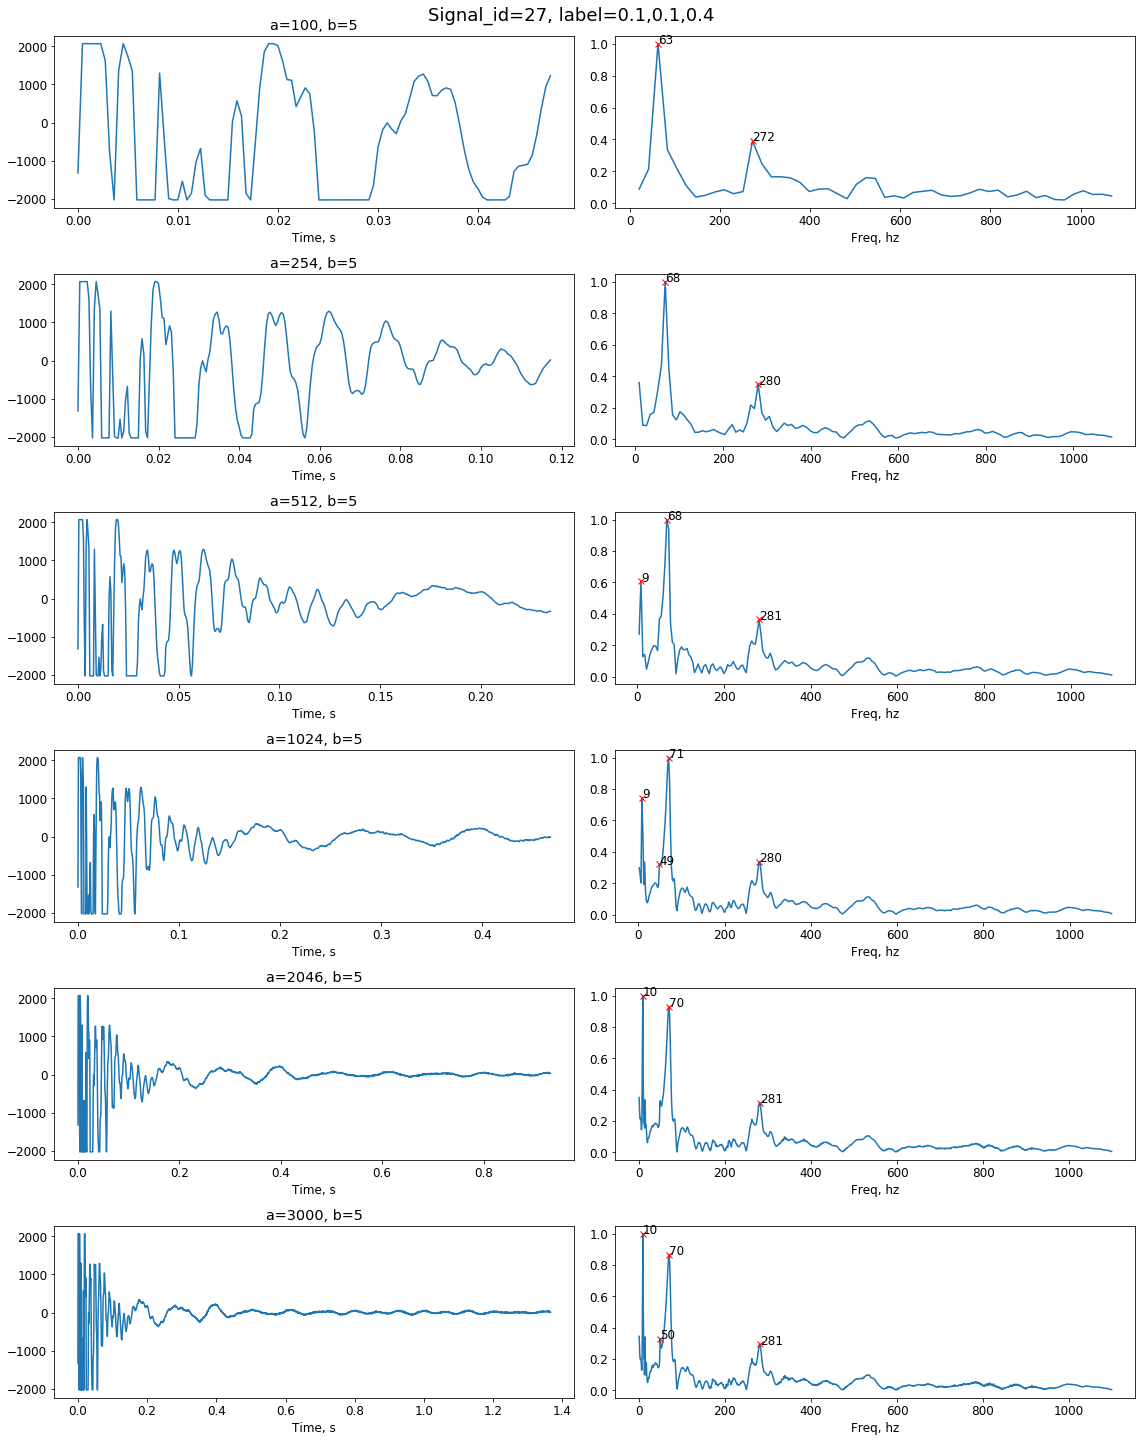

In [17]:
# fix b, change a
my_as = [100, 254, 512, 1024, 2046, 3000]
signal_ids = np.random.randint(low=0, high=50, size=10)
signal_id = 27
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(16,20))
for i, my_a in enumerate(my_as):
    freq, mag, ang, sample_signal, _t = fft_analysis(my_b,my_a,signal_id)
    ax[i][0].plot(_t, sample_signal)
    ax[i][0].set_xlabel('Time, s')
    _peaks,_ = find_peaks(mag/mag.max(), height=0.2, distance=int(20/np.diff(freq)[0])+1)
    ax[i][1].plot(freq, mag/mag.max())
    ax[i][1].plot(freq[_peaks], mag[_peaks]/mag.max(), 'rx')
    ax[i][1].set_xlabel('Freq, hz')
    for _peak in _peaks:
        #print(freq[_peak], mag[_peak], str('{:.0f}'.format(mag[_peak])))
        ax[i][1].text(x=freq[_peak], y=mag[_peak]/mag.max(), s=str('{:.0f}'.format(freq[_peak])))

#     ax[i][2].plot(freq, ang)
#     ax[i][2].set_xlabel('Freq, hz')
    ax[i][0].set_title('a=' + str(my_a)+ ', b=' + str(my_b))
    plt.suptitle('Signal_id=' + str(signal_id) + ', label={:.1f},{:.1f},{:.1f}'.format(*labels[signal_id]), fontsize=18, y= 1.0)
plt.tight_layout(True)
plt.savefig(save_dir+'{}_{}_fft.png'.format(fname, signal_id))
plt.show()

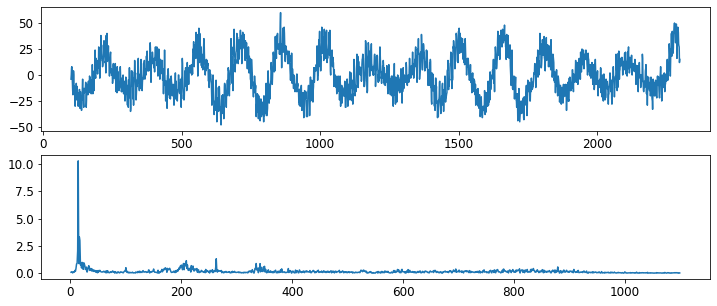

In [49]:
# inherent noise
chunck = pac_df.iloc[100:2300]

fig, ax = plt.subplots(2, figsize=(12,5))
ax[0].plot(chunck.pac)

sf = 2.2e3 #kPxx, freqs, bins, im = ax2.specgram(x, NFFT=NFFT, Fs=Fs, noverlap=900)Hz
sample_signal = chunck.pac.values
n = len(sample_signal)
fhat = np.fft.fft(sample_signal, n)
frequencies = np.fft.fftfreq(n, 1/sf)
#frequencies = np.arange(n)
L = np.arange(1,np.floor(n/2),dtype='int')
magnitude = np.abs(fhat)/n
ax[1].plot(frequencies[L], magnitude[L])
plt.show()

In [51]:
# spectogram

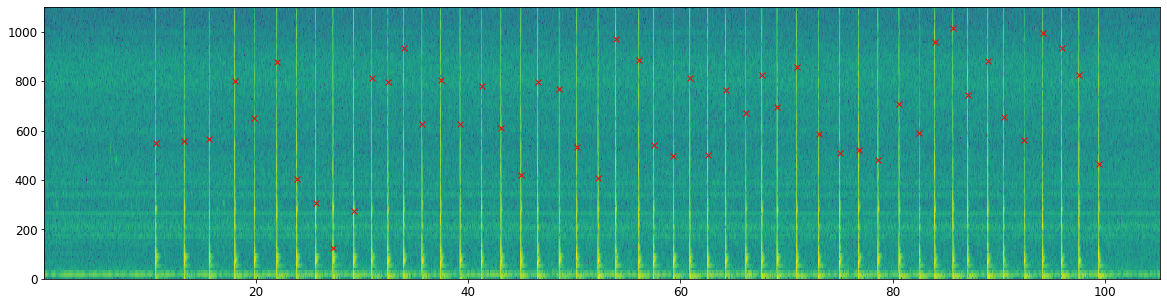

In [83]:
all_signal = pac_df.pac.values
NFFT = 254
overlap = int(NFFT*0.8)
fig, ax = plt.subplots(figsize=(20,5))
_, _, _t, _ = ax.specgram(all_signal, NFFT=NFFT, Fs=sf, noverlap=overlap)
for i, _peak in enumerate(tapped_idx):
    _x = labels[i][2]*1600
    ax.plot(_peak/sf, _x, 'rx')
plt.savefig(save_dir+'{}_specgram.pdf'.format(fname), dpi=1000)
plt.show()

In [66]:
_t.shape

(4123,)